In [23]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Read the dataset
df = pd.read_csv("datasets/Generated_Advertising.csv", header=0)
df.head()

,TV,Radio,Newspaper,Sales
0,208.341364,14.212316,77.548423,12.376476
1,66.973094,14.474410,44.914672,4.690054
2,304.746692,24.120211,33.688971,17.149566
3,256.036647,22.902213,40.201799,12.933376
4,156.616905,33.422450,2.408018,9.329850


In [25]:
# Drop unnecessary columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10674 entries, 0 to 10673
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         10674 non-null  float64
 1   Radio      10674 non-null  float64
 2   Newspaper  10674 non-null  float64
 3   Sales      10674 non-null  float64
dtypes: float64(4)
memory usage: 333.7 KB


In [27]:
df.describe()

,TV,Radio,Newspaper,Sales
count,10674.000000,10674.000000,10674.000000,10674.000000
mean,148.120878,23.716692,31.483877,8.978256
std,82.390401,14.045287,20.319389,4.353859
min,0.000000,0.000000,0.000000,0.000000
25%,88.450899,13.424171,16.084452,5.895706
50%,146.387978,23.403412,30.609839,8.810252
75%,205.109383,33.114484,45.233365,11.847503
max,445.268316,77.420645,114.904852,26.404876


In [28]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

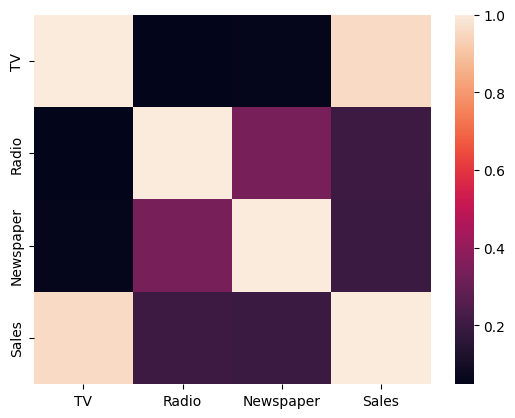

In [29]:
# Correlation matrix
heatmap_data = df.corr()
sns.heatmap(heatmap_data)
plt.show()

Text(0, 0.5, 'Sales')

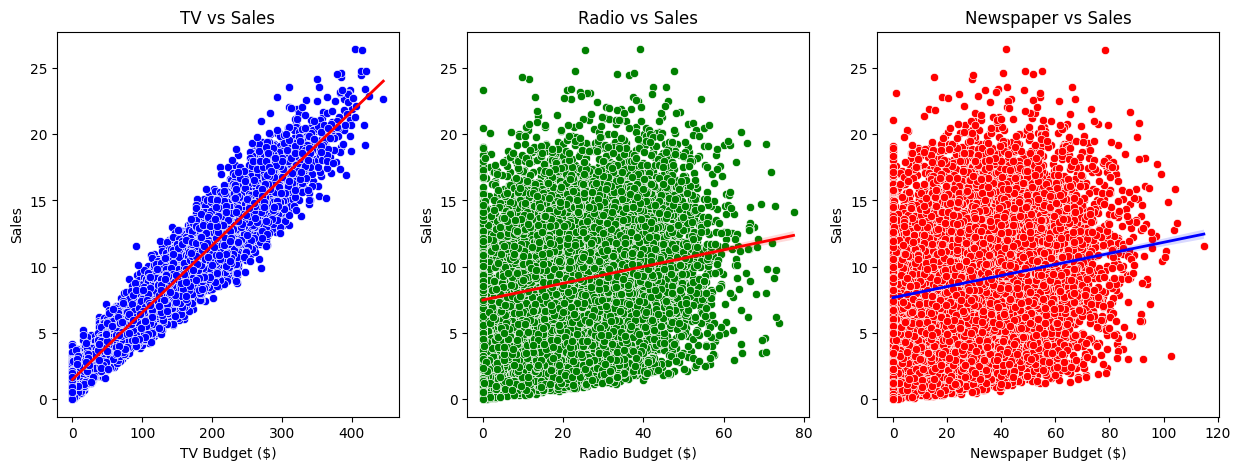

In [30]:
plt.figure(figsize=(15, 5))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
sns.regplot(x='TV', y='Sales', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('TV vs Sales')
plt.xlabel('TV Budget ($)')
plt.ylabel('Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df, color='green')
sns.regplot(x='Radio', y='Sales', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Radio vs Sales')
plt.xlabel('Radio Budget ($)')
plt.ylabel('Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='red')
sns.regplot(x='Newspaper', y='Sales', data=df, scatter=False, color='blue', line_kws={'linewidth': 2})
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Budget ($)')
plt.ylabel('Sales')

In [31]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [32]:
# Initialize objects
ridge = Ridge()
scaler = StandardScaler()

In [33]:
# Assign independent and dependent values
X = df.drop(columns=["Sales"])
y = df.loc[:, "Sales"]

In [34]:
# Train Test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [37]:
y_pred = ridge.predict(X_test_scaled)

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [39]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R2 score: {r2} \n MSE: {mse} \n RMSE: {rmse}")

R2 score: 0.9484358288456671 
 MSE: 0.9917736432911839 
 RMSE: 0.9958783275537147


In [40]:
import pickle

In [41]:
# Save the scaler
with open('models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the Ridge regression model
with open('models/ridge_model.pkl', 'wb') as model_file:
    pickle.dump(ridge, model_file)
